# Importing dataset

In [1]:
import pandas as pd
data = pd.read_csv("diabetes.csv") # Reading the Data
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


The data shows the stats of a person and the last column tells if he is Diabetic or not.

Let's check some general description of the data

In [2]:
# 1. Describe
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Things to focus on in the Description of the Data:
1. Count Should be same for all the columns - it means No missing data.

2. The minimum and maximum values should be acceptable. Ex. here min values for first 6 columns is 0.00 which is not possible which indicated that this data is missing.

### 2. Check the Destribution of the data

C:\Users\akash\.conda\envs\General\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\akash\.conda\envs\General\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\akash\.conda\envs\General\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

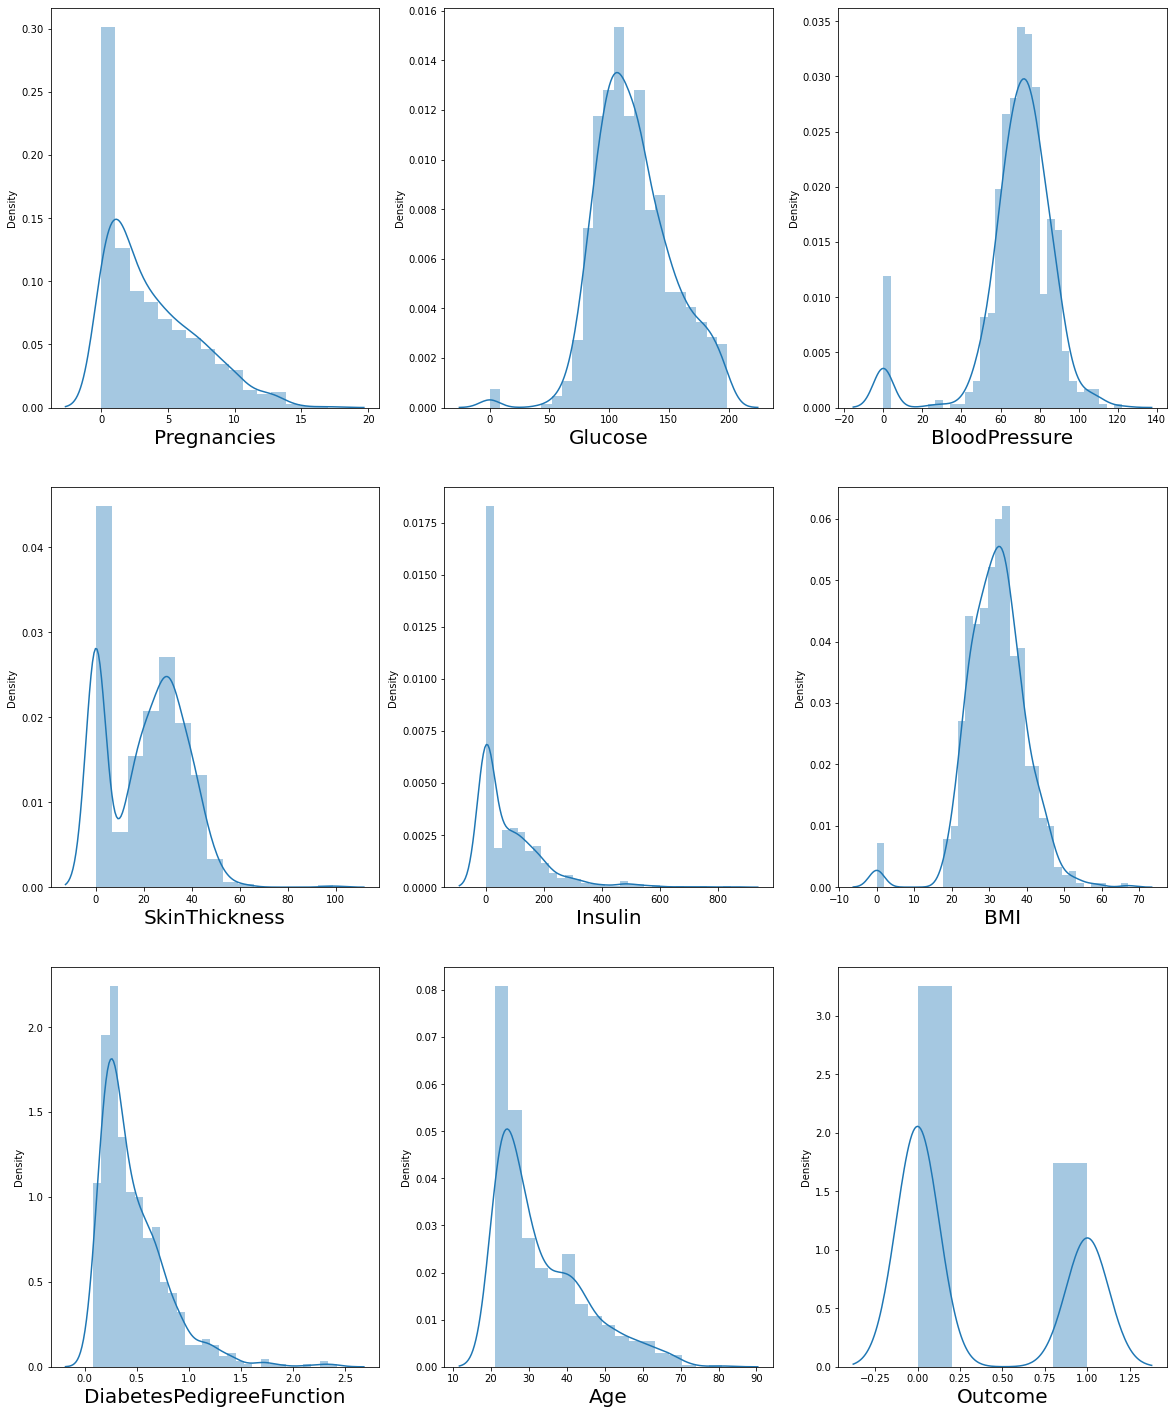

In [3]:
# let's see how data is distributed for every column
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,25), facecolor='White')
plotnumber = 1

for column in data:
    if plotnumber <= 9: # As we have 9 columns
        sns.distplot(data[column],
                    ax = plt.subplot(3,3,plotnumber))
        plt.xlabel(column, fontsize=20)
    plotnumber += 1
plt.show()

As we have observed earlier we have some feature values to be _0_ which is not possible. So let's replace those vaalues with the mean of that column.

In [4]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']

for feature in features:
    data[feature] = data[feature].replace(to_replace=0, value=data[feature].mean())
    
# Let's check the data now.
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


C:\Users\akash\.conda\envs\General\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\akash\.conda\envs\General\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\akash\.conda\envs\General\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

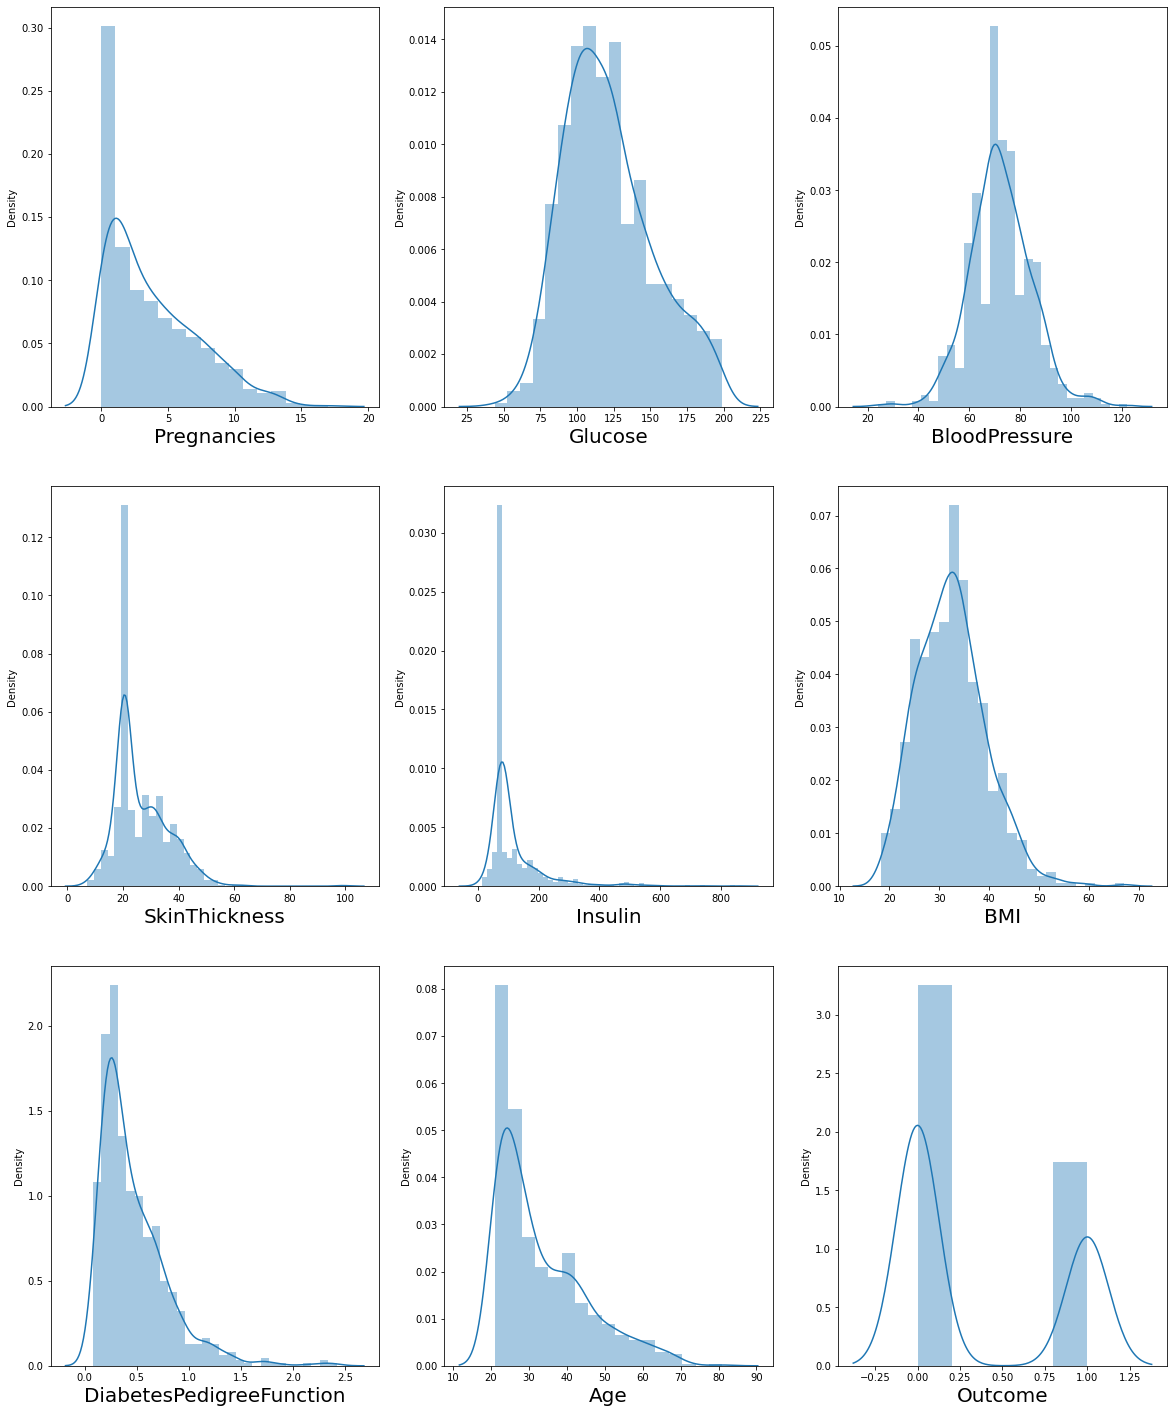

In [6]:
# Let's see the Destribution again to see the impact of this imputation
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,25), facecolor='White')
plotnumber = 1

for column in data:
    if plotnumber <= 9: # As we have 9 columns
        sns.distplot(data[column],
                    ax = plt.subplot(3,3,plotnumber))
        plt.xlabel(column, fontsize=20)
    plotnumber += 1
plt.show()

<AxesSubplot:>

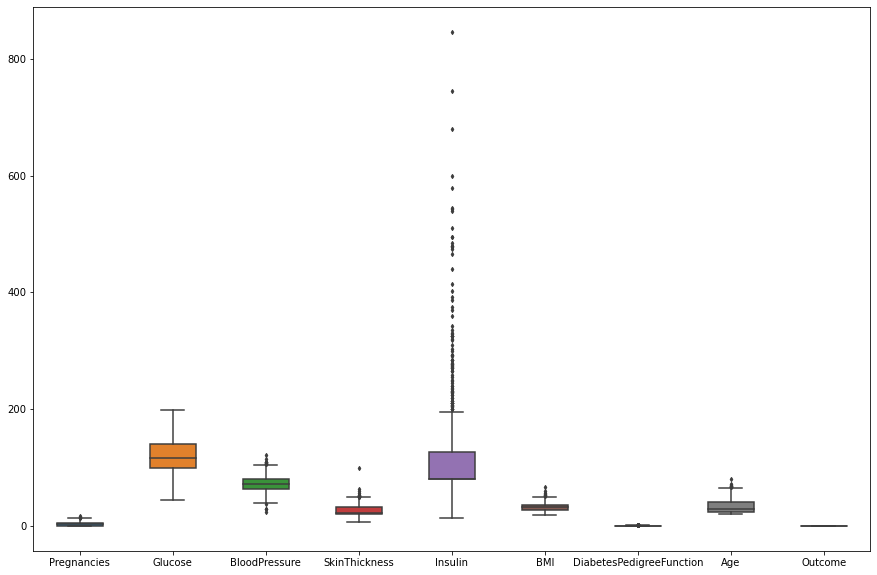

In [7]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5, ax=ax,  fliersize=3)

In [8]:
q = data['Pregnancies'].quantile(0.98)
# we are removing the top 2% data from the Pregnancies column
data_cleaned = data[data['Pregnancies']<q]

q = data_cleaned['BMI'].quantile(0.99)
# we are removing the top 1% data from the BMI column
data_cleaned  = data_cleaned[data_cleaned['BMI']<q]

q = data_cleaned['SkinThickness'].quantile(0.99)
# we are removing the top 1% data from the SkinThickness column
data_cleaned  = data_cleaned[data_cleaned['SkinThickness']<q]

q = data_cleaned['Insulin'].quantile(0.95)
# we are removing the top 5% data from the Insulin column
data_cleaned  = data_cleaned[data_cleaned['Insulin']<q]

q = data_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
# we are removing the top 1% data from the DiabetesPedigreeFunction column
data_cleaned  = data_cleaned[data_cleaned['DiabetesPedigreeFunction']<q]

q = data_cleaned['Age'].quantile(0.99)
# we are removing the top 1% data from the Age column
data_cleaned  = data_cleaned[data_cleaned['Age']<q]

C:\Users\akash\.conda\envs\General\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\akash\.conda\envs\General\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\akash\.conda\envs\General\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

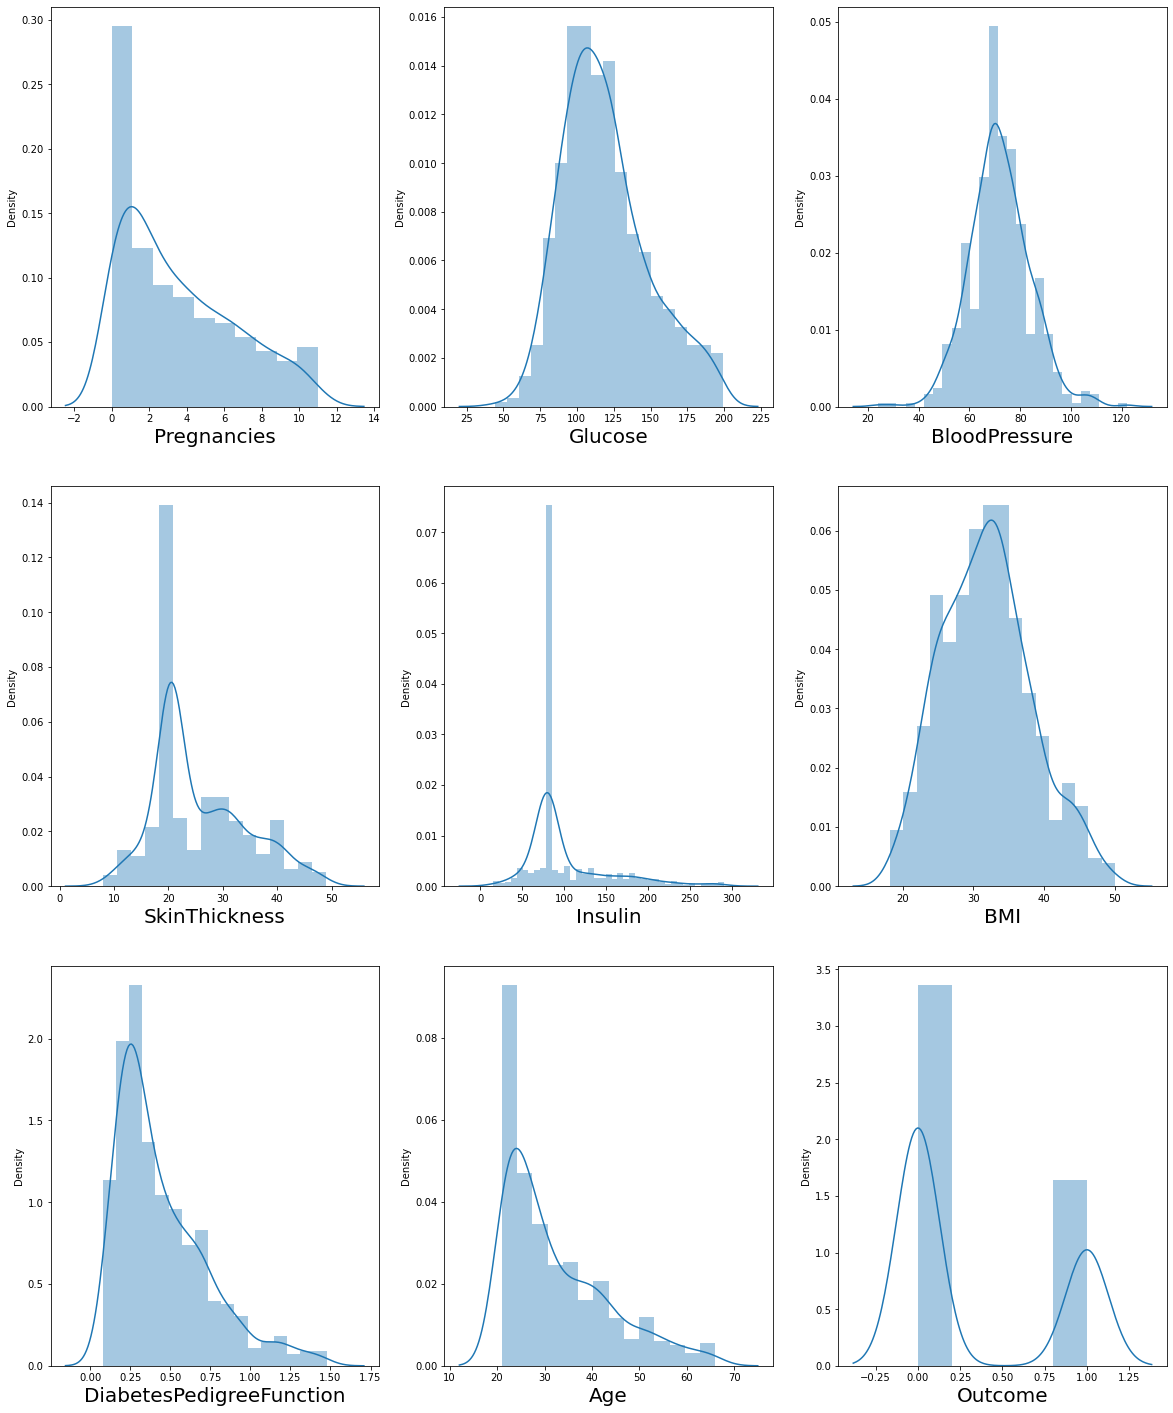

In [9]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data_cleaned:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data_cleaned[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [10]:
X = data.drop(columns = ['Outcome'])
y = data['Outcome']

In [11]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,1.431075,Pregnancies
1,1.347308,Glucose
2,1.247914,BloodPressure
3,1.450510,SkinThickness
4,1.262111,Insulin
5,1.550227,BMI
6,1.058104,DiabetesPedigreeFunction
7,1.605441,Age


In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25)

In [13]:
# let's fit the data into kNN model and see how well it performs:

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [14]:
y_pred = knn.predict(x_test)

In [15]:
knn.score(x_train,y_train)

0.8177083333333334

In [16]:
from sklearn.metrics import accuracy_score
print("The accuracy score is : ", accuracy_score(y_test,y_pred))

The accuracy score is :  0.71875


## Hyper Parameter Tuning
Let's try to increase the accuracy by using hyperparameter tuning.

In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,27,30,32,34],
               'n_neighbors' : [3,5,7,9,10,11,12,13]
              }

gridsearch = GridSearchCV(knn, param_grid,verbose=3)

gridsearch.fit(x_train,y_train)

# let's see the  best parameters according to gridsearch
gridsearch.best_params_

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.750, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.704, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.739, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.748, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.765, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.784, total=   0.0s
[CV] algorith

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=7, score=0.730, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=7, score=0.765, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=7, score=0.800, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=9, score=0.784, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=9, score=0.748, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=9, score=0.748, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=9 ................
[CV]

[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=11, score=0.791, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=11, score=0.765, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=11, score=0.817, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=12 ...............
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=12, score=0.759, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=12 ...............
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=12, score=0.809, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=12 ...............
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=12, score=0.800, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=12 ...............
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=12, score=0.765, 

[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=7, score=0.765, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=7, score=0.800, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=9, score=0.784, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=9, score=0.748, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=9, score=0.748, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=9, score=0.748, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=9, score=0.791, total= 

[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=11, score=0.817, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=12 ...............
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=12, score=0.759, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=12 ...............
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=12, score=0.809, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=12 ...............
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=12, score=0.800, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=12 ...............
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=12, score=0.765, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=12 ...............
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=12, score=0.800, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=13 ...............
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=13, score=0.776, 

[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=3, score=0.748, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=3, score=0.765, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=5, score=0.784, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=5, score=0.722, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=5, score=0.722, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=5, score=0.757, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=5, score=0.774, total= 

[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=10, score=0.791, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=10, score=0.791, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=10, score=0.748, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=10, score=0.783, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=11, score=0.784, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=11, score=0.774, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=11, score=0.791, total=   0.0s


[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=13, score=0.809, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=13, score=0.783, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=13, score=0.757, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=13, score=0.809, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=3, score=0.750, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=3, score=0.704, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=3, score=0.739, total=   0.0s
[CV

[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=9, score=0.748, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=9, score=0.791, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=10, score=0.784, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=10, score=0.791, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=10, score=0.791, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=10, score=0.748, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=10, score=0.783, total=   0.0s
[C

[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=3, score=0.748, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=3, score=0.765, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=5, score=0.784, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=5, score=0.722, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=5, score=0.722, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=5, score=0.757, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=5, score=0.774, total=   0.0s
[CV] al

[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=10, score=0.791, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=10, score=0.791, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=10, score=0.748, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=10, score=0.783, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=11, score=0.784, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=11, score=0.774, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=11, score=0.791, total=   0.0s


[CV]  algorithm=brute, leaf_size=18, n_neighbors=13, score=0.809, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=3, score=0.750, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=3, score=0.704, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=3, score=0.739, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=3, score=0.748, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=3, score=0.765, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=5, score=0.784, total=   0.0s
[CV] algorithm=brute

[CV]  algorithm=brute, leaf_size=25, n_neighbors=10, score=0.784, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=10, score=0.791, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=10, score=0.791, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=10, score=0.748, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=10, score=0.783, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=11, score=0.784, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=11, score=0.774, total=   0.0s
[CV] algorithm

[CV]  algorithm=brute, leaf_size=27, n_neighbors=13, score=0.809, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=3, score=0.750, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=3, score=0.704, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=3, score=0.739, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=3, score=0.748, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=3, score=0.765, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=5, score=0.784, total=   0.0s
[CV] algorithm=brute

[CV]  algorithm=brute, leaf_size=32, n_neighbors=11, score=0.817, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=12, score=0.759, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=12, score=0.809, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=12, score=0.800, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=12, score=0.765, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=12, score=0.800, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=13 ...................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=13, score=0.776, total=   0.0s
[CV] algorithm

[Parallel(n_jobs=1)]: Done 840 out of 840 | elapsed:    9.3s finished


{'algorithm': 'ball_tree', 'leaf_size': 18, 'n_neighbors': 12}

In [23]:
# we will use the best parameters in our k-NN algorithm and check if accuracy is increasing.
knn = KNeighborsClassifier(algorithm = 'ball_tree', leaf_size =18, n_neighbors =12)

In [24]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, n_neighbors=12)

In [25]:
knn.score(x_train,y_train)

0.8125

In [26]:
knn.score(x_test,y_test)

0.703125

Great, accuracy score has increased for our test data. So, indeed our model was overfitting before.
Now, it looks better.


Let's now use k-fold cross validation and check how well our model is generalizing over our dataset:
We are randomly selecting our k to be 12 for k fold.

# k-fold cross validation 

In [28]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=12,random_state= 42)
kfold.get_n_splits(X_scaled)

12

In [29]:
from statistics import mean
knn = KNeighborsClassifier(algorithm = 'ball_tree', leaf_size =18, n_neighbors =11)
cnt =0
count=[]
train_score =[]
test_score = []

for train_index,test_index in kfold.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index] # our scaled data is an array so it can work on x[value]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index] # y is a dataframe so we have to use "iloc" to retreive data
    knn.fit(X_train,y_train)
    train_score_ = knn.score(X_train,y_train)
    test_score_ =  knn.score(X_test,y_test)
    cnt+=1
    count.append(cnt)
    train_score.append(train_score_)
    test_score.append(test_score_)
    
    print("for k = ", cnt)
    print("train_score is :  ", train_score_, "and test score is :  ", test_score_)
print("************************************************")
print("************************************************")
print("Average train score is :  ", mean(train_score))
print("Average test score is :  ", mean(test_score))

for k =  1
train_score is :   0.8068181818181818 and test score is :   0.6875
for k =  2
train_score is :   0.7926136363636364 and test score is :   0.765625
for k =  3
train_score is :   0.7954545454545454 and test score is :   0.78125
for k =  4
train_score is :   0.7997159090909091 and test score is :   0.734375
for k =  5
train_score is :   0.7940340909090909 and test score is :   0.65625
for k =  6
train_score is :   0.7954545454545454 and test score is :   0.765625
for k =  7
train_score is :   0.7997159090909091 and test score is :   0.703125
for k =  8
train_score is :   0.7926136363636364 and test score is :   0.734375
for k =  9
train_score is :   0.7840909090909091 and test score is :   0.890625
for k =  10
train_score is :   0.7997159090909091 and test score is :   0.796875
for k =  11
train_score is :   0.7997159090909091 and test score is :   0.734375
for k =  12
train_score is :   0.7911931818181818 and test score is :   0.8125
*******************************************

In [32]:
# let's save the model
import pickle

with open('D:\Akash\Recover\MY NOTES\Machine Learning\00 Organized ML Notes\03 Classification\02 KNN'+ '/modelForPrediction.sav', 'wb') as f:
    pickle.dump(knn,f)
    
with open('D:\Akash\Recover\MY NOTES\Machine Learning\00 Organized ML Notes\03 Classification\02 KNN'+ '/standardScalar.sav', 'wb') as f:
    pickle.dump(scalar,f)

ValueError: embedded null character